In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
data = pd.read_csv('./src/USA_cars_datasets.csv')
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
import seaborn as sns

Модель будем строить следующим образом: независимая переменная - год  выпуска авто, зависимая - пробег авто.
Строить будем классическую линейную регрессию, а также гребневую регрессию. 

In [2]:
x = data.year.values.reshape(-1, 1)
y = data.mileage.values

model = Ridge(alpha=1000.5).fit(x,y)
model2 = LinearRegression().fit(x,y)

Построим график, чтобы проанализировать, какая модель лучше отображает зависимость в данных.

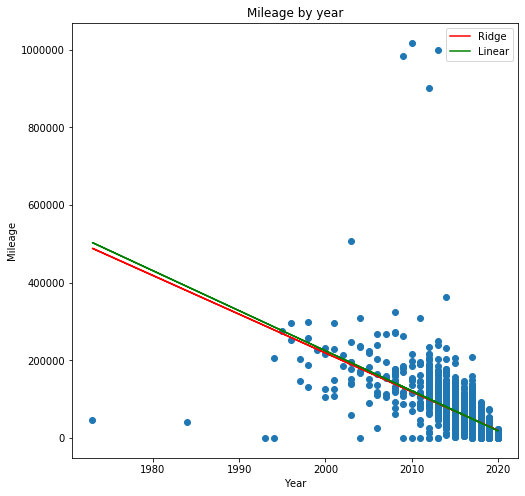

In [3]:
y_pred = model.predict(x.reshape(-1, 1))
y_pred2 = model2.predict(x.reshape(-1, 1))

plt.figure(figsize=(8, 8))
plt.scatter(x, y)
plt.xlabel('Year')
plt.ylabel('Mileage')
plt.title('Mileage by year')
plt.plot(x, y_pred, color='r', label = 'Ridge')
plt.plot(x, y_pred2, color='g', label = 'Linear')
plt.legend()

По графику не совсем понятно, какая регрессия подходит лучше. Посмотрим, какая модель ошибается в большем количестве раз.

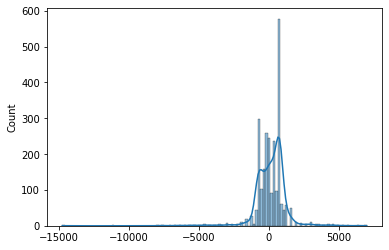

In [9]:
errors = abs(y - y_pred) - abs(y - y_pred2)
sns.histplot(data=errors, kde=True)

Очевидно-видно, что гребневая регрессия подходит лучше.